<a href="https://colab.research.google.com/github/Yosefin07/UTS_Clasifikasi_CNN/blob/main/UTS_Klasifikasi_Kucing_Anjing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()  # pilih kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yosefinyzand070","key":"90312eecc4981ead702a593d6a0347f4"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c dogs-vs-cats
!unzip -q dogs-vs-cats.zip -d /content/dataset
!unzip -q /content/dataset/train.zip -d /content/dataset/train


403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/competitions/data/download-all/dogs-vs-cats
unzip:  cannot find or open dogs-vs-cats.zip, dogs-vs-cats.zip.zip or dogs-vs-cats.zip.ZIP.
unzip:  cannot find or open /content/dataset/train.zip, /content/dataset/train.zip.zip or /content/dataset/train.zip.ZIP.


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load dataset Dogs vs Cats
(ds_train, ds_val), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

IMG_SIZE = 224

# Preprocessing function
def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

ds_train = ds_train.map(format_image).batch(32).prefetch(tf.data.AUTOTUNE)
ds_val = ds_val.map(format_image).batch(32).prefetch(tf.data.AUTOTUNE)

print("Dataset siap pakai!")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.DF0TX5_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Dataset siap pakai!


In [ ]:
# Load pretrained VGG16 tanpa classifier top
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE,IMG_SIZE,3))
for layer in base_model.layers:
    layer.trainable = False  # freeze semua layer

# Tambahkan classifier custom
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
import tensorflow as tf
print("GPU available:", tf.config.list_physical_devices('GPU'))


GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=10
)


Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 152s 234ms/step - accuracy: 0.8425 - loss: 0.3333 - val_accuracy: 0.9245 - val_loss: 0.1795
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 123s 212ms/step - accuracy: 0.9319 - loss: 0.1693 - val_accuracy: 0.9336 - val_loss: 0.1565
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 123s 212ms/step - accuracy: 0.9439 - loss: 0.1388 - val_accuracy: 0.9364 - val_loss: 0.1517
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 124s 212ms/step - accuracy: 0.9521 - loss: 0.1226 - val_accuracy: 0.9377 - val_loss: 0.1526
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 142s 212ms/step - accuracy: 0.9627 - loss: 0.1002 - val_accuracy: 0.9377 - val_loss: 0.1539
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 123s 212ms/step - accuracy: 0.9666 - loss: 0.0898 - val_accuracy: 0.9368 - val_loss: 0.1542
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 123s 211ms/step - accuracy: 0.9739 - loss: 0.0716 - val_accuracy: 0.9344 - val_loss: 0.1618
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 123s 211ms/step - accuracy: 0.9764 -

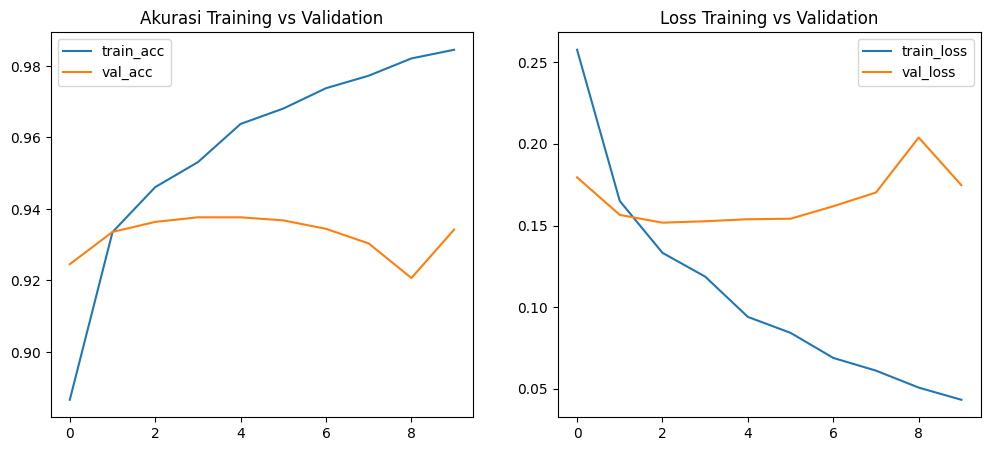

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Akurasi Training vs Validation')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Training vs Validation')
plt.legend()

plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image

# Upload gambar baru untuk prediksi
from google.colab import files
uploaded = files.upload()  # pilih file gambar kucing/anjing

for fn in uploaded.keys():
    img = image.load_img(fn, target_size=(IMG_SIZE,IMG_SIZE))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    if pred[0][0] > 0.5:
        print(f"{fn} → Prediksi: Anjing 🐶")
    else:
        print(f"{fn} → Prediksi: Kucing 🐱")


Saving cat1.jpg to cat1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
cat1.jpg → Prediksi: Kucing 🐱


In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np

# Upload file gambar dari komputer
uploaded = files.upload()

for fn in uploaded.keys():
    img = image.load_img(fn, target_size=(224,224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    if pred[0][0] > 0.5:
        print(f"{fn} → Prediksi: Anjing 🐶")
    else:
        print(f"{fn} → Prediksi: Kucing 🐱")


Saving cat1.jpg to cat1 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
cat1 (1).jpg → Prediksi: Kucing 🐱


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(ds_train, validation_data=ds_val, epochs=5)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 127s 213ms/step - accuracy: 0.9858 - loss: 0.0424 - val_accuracy: 0.9366 - val_loss: 0.1749
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 123s 211ms/step - accuracy: 0.9877 - loss: 0.0359 - val_accuracy: 0.9316 - val_loss: 0.1983
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 123s 212ms/step - accuracy: 0.9876 - loss: 0.0325 - val_accuracy: 0.9372 - val_loss: 0.1975
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 123s 212ms/step - accuracy: 0.9897 - loss: 0.0305 - val_accuracy: 0.9368 - val_loss: 0.2003
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 123s 212ms/step - accuracy: 0.9939 - loss: 0.0239 - val_accuracy: 0.9353 - val_loss: 0.2044


In [ ]:
test_loss, test_acc = model.evaluate(ds_val)
print(f"Loss: {test_loss:.4f}")
print(f"Akurasi: {test_acc:.4f}")


146/146 ━━━━━━━━━━━━━━━━━━━━ 25s 170ms/step - accuracy: 0.9382 - loss: 0.1861
Loss: 0.2044
Akurasi: 0.9353


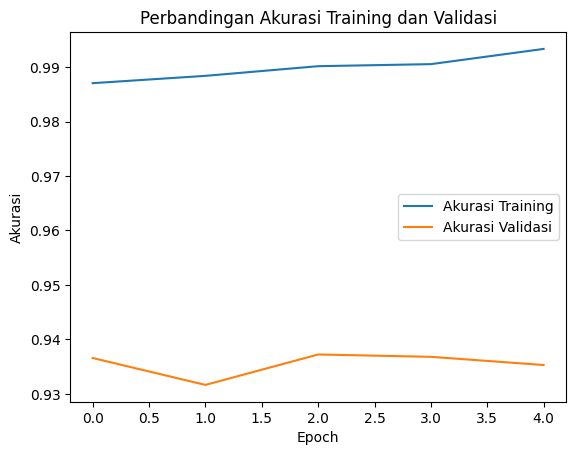

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Perbandingan Akurasi Training dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np

# Upload file gambar dari komputer
uploaded = files.upload()

for fn in uploaded.keys():
    img = image.load_img(fn, target_size=(224,224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    if pred[0][0] > 0.5:
        print(f"{fn} → Prediksi: Anjing 🐶")
    else:
        print(f"{fn} → Prediksi: Kucing 🐱")


Saving dog1.jpg to dog1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step
dog1.jpg → Prediksi: Anjing 🐶
